# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [109]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

### Null and Outliers values

In [110]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [111]:
penguins_df.describe()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [112]:
penguins_df = penguins_df.dropna()
penguins_df[penguins_df['flipper_length_mm']>4000]
penguins_df[penguins_df['flipper_length_mm']<0]
penguins_clean = penguins_df.drop([9,14])

### Preprocessing

In [113]:
#getting features 
features = penguins_clean.drop(columns='sex')
#getting dummies for categorical columns 
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)
y = penguins_clean['sex']


### Scale

In [114]:

scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)


### PCA

In [115]:
pca = PCA(n_components=None)
fit_pca = pca.fit(penguins_preprocessed)
fit_pca.explained_variance_ratio_
n_components=sum(fit_pca.explained_variance_ratio_>0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

### optimal number of clusters 

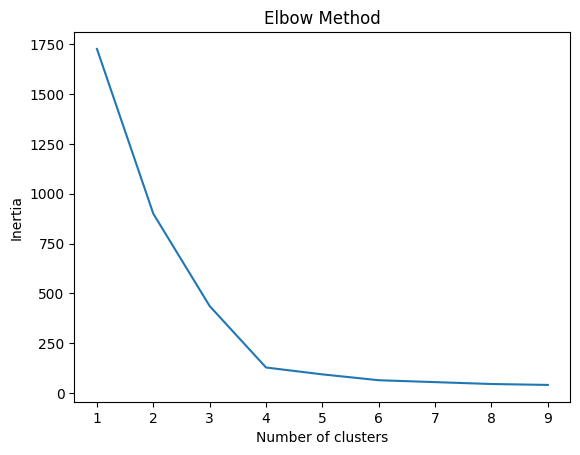

In [116]:
# Create a list of distortions from the kmeans function
inertia = []
for k in range(1, 10):
   kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
   inertia.append(kmeans.inertia_)  
    
plt.plot(range(1, 10), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### k=4

In [117]:
n_clusters=4
kmeans=KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)

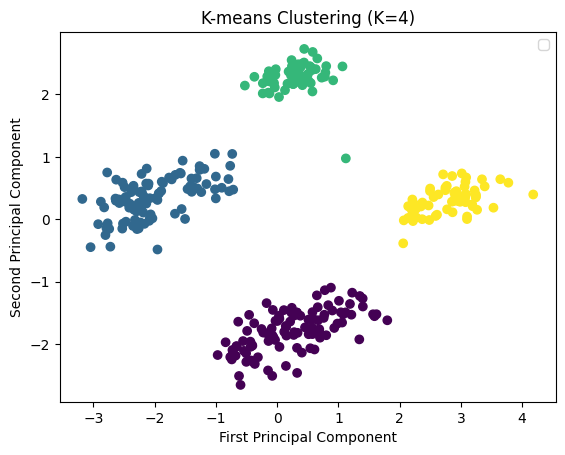

In [118]:
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [119]:
penguins_clean['label']=kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins=penguins_clean.groupby('label')[numeric_columns].mean()
stat_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,label
label,,,,
0,43.878302,19.111321,194.764151,0.0
1,40.217757,17.611215,189.046729,1.0
2,45.545763,14.262712,212.779661,2.0
3,49.473770,15.718033,221.540984,3.0
